# Dataset load

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('/home/l-tiezerin/mentoria_dados/data_tables/telecom_customer_churn.csv')
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,NaN,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,NaN,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,NaN,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [3]:
# tem linhas duplicadas?
df[df.duplicated()]

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason


In [4]:
# tem clientes duplicados?
df['Customer ID'].duplicated().sum()

np.int64(0)

In [5]:
# não preciso dessa coluna
df = df.drop('Customer ID', axis=1)

# Qualitative

In [6]:
print('Cardinality by column:')
print()

for col in df.columns:
    if df[col].dtype == 'object':
        print(f'{col}: {df[col].nunique()}')

Cardinality by column:

Gender: 2
Married: 2
City: 1106
Offer: 5
Phone Service: 2
Multiple Lines: 2
Internet Service: 2
Internet Type: 3
Online Security: 2
Online Backup: 2
Device Protection Plan: 2
Premium Tech Support: 2
Streaming TV: 2
Streaming Movies: 2
Streaming Music: 2
Unlimited Data: 2
Contract: 3
Paperless Billing: 2
Payment Method: 3
Customer Status: 3
Churn Category: 5
Churn Reason: 20


Provavelmente tem concentração dos clientes em poucas cidades.

## City analysis

City
Los Angeles         4.160159
San Diego           4.046571
San Jose            1.590231
Sacramento          1.533437
San Francisco       1.476643
                      ...   
Eldridge            0.028397
Holtville           0.028397
Johannesburg        0.028397
South Lake Tahoe    0.028397
Jacumba             0.028397
Name: proportion, Length: 1106, dtype: float64

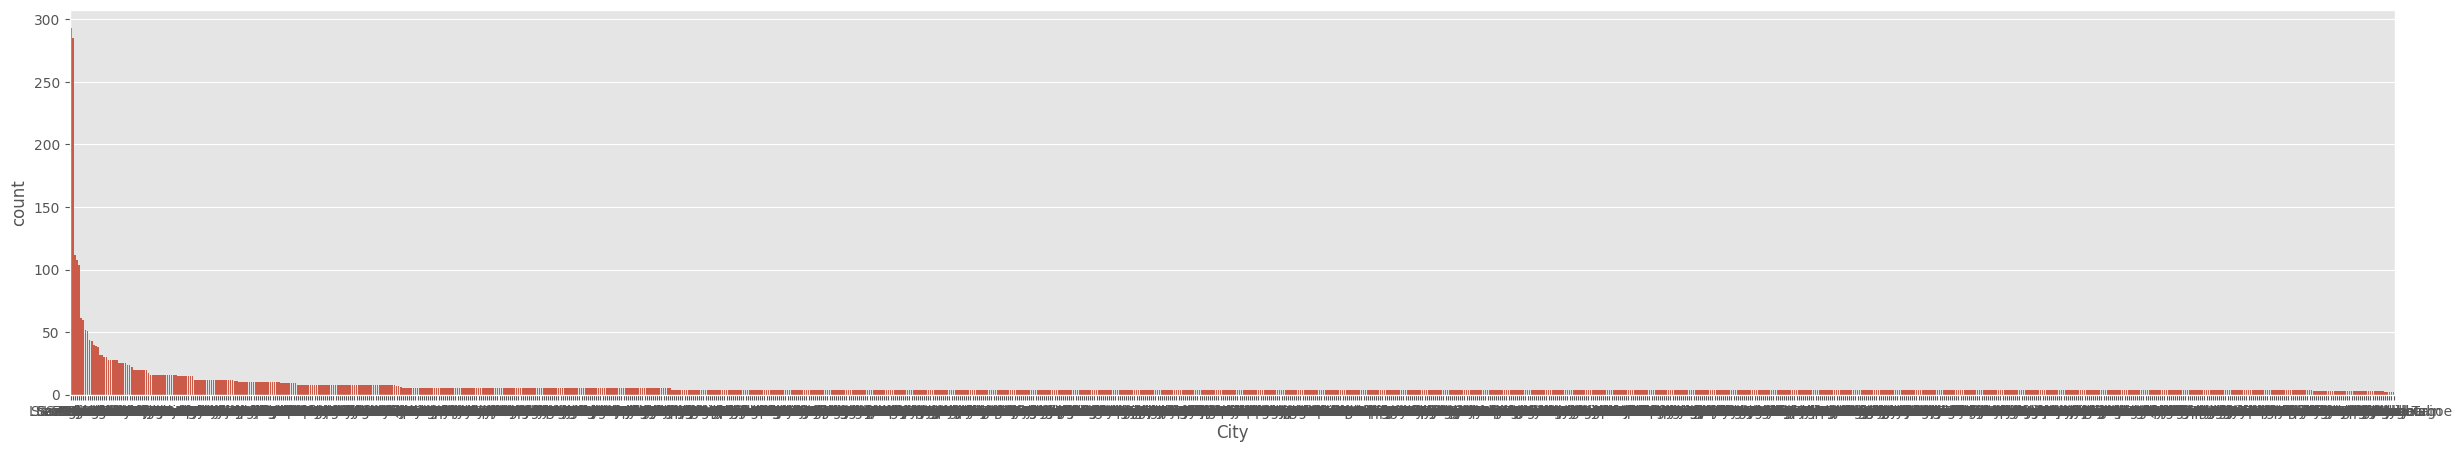

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

display(df['City'].value_counts(normalize=True)*100)
order = df['City'].value_counts().index

plt.figure(figsize=(30, 5))
sns.countplot(data=df, x='City', order=order)
plt.show()

Tem concentração em algumas cidades, de fato.

In [8]:
def city_composition(dataframe, percent):
    df_city = pd.DataFrame(dataframe['City'].value_counts(normalize=True)*100).reset_index()
    df_city['cumsum'] = df_city['proportion'].cumsum()
    percent_clients = df_city.query(f'cumsum <= {percent}').index[-1]
    _80_20 = (percent_clients / df_city.shape[0]) * 100

    return _80_20

print(city_composition(df, '80'))
print(city_composition(df, '50'))

66.99819168173599
20.524412296564197


80% dos clientes vivem em 67% das cidades, enquanto 50% dos clientes vivem em 20%. E em relação a cada situação?

In [9]:
print('20% dos clientes')
for status in df['Customer Status'].unique():
    print(f'{status}: {city_composition(df[df['Customer Status']==status], '20')}')

print()
print('50% dos clientes')
for status in df['Customer Status'].unique():
    print(f'{status}: {city_composition(df[df['Customer Status']==status], '50')}')

print()
print('80% dos clientes')
for status in df['Customer Status'].unique():
    print(f'{status}: {city_composition(df[df['Customer Status']==status], '80')}')

20% dos clientes
Stayed: 1.8382352941176472
Churned: 0.5148005148005148
Joined: 5.167173252279635

50% dos clientes
Stayed: 21.231617647058822
Churned: 14.929214929214929
Joined: 30.69908814589666

80% dos clientes
Stayed: 59.466911764705884
Churned: 51.737451737451735
Joined: 72.03647416413374


80% nem tem tanta diferença, mas 50% e 20% tem. Os que largaram o serviço estão alocados em cidades mais específicas que o restante.

In [10]:
for status in df['Customer Status'].unique():
    print(f'{status}:')
    display(df[df['Customer Status']==status]['City'].value_counts(normalize=True)*100)
    print()

Stayed:


City
Los Angeles        4.173729
San Diego          1.970339
San Jose           1.716102
Sacramento         1.610169
San Francisco      1.398305
                     ...   
South Dos Palos    0.021186
Quincy             0.021186
Avenal             0.021186
Union City         0.021186
Lewiston           0.021186
Name: proportion, Length: 1088, dtype: float64


Churned:


City
San Diego         9.898341
Los Angeles       4.173355
San Francisco     1.658641
San Jose          1.551632
Fallbrook         1.391118
                    ...   
Livermore         0.053505
Valley Village    0.053505
Porterville       0.053505
Browns Valley     0.053505
Elk Creek         0.053505
Name: proportion, Length: 777, dtype: float64


Joined:


City
Los Angeles        3.964758
San Francisco      1.541850
San Diego          1.541850
Sacramento         1.321586
Glendale           1.321586
                     ...   
Kneeland           0.220264
Cressey            0.220264
Lake Isabella      0.220264
Rough And Ready    0.220264
Sunol              0.220264
Name: proportion, Length: 329, dtype: float64

Existe diferença significativa na distribuição dos status dentre as cidades? A cidade é causadora do churn?
- verificar qual o teste de hipótese adequado aqui

In [48]:
df['Customer Status'].unique()

array(['Stayed', 'Churned', 'Joined'], dtype=object)

In [ ]:
all_status_city_count = pd.DataFrame(df['City'].value_counts().sort_index()).reset_index()
all_status_city_count.columns = ['City', 'Total']

def city_count(status):
    df_temp = pd.DataFrame(df[df['Customer Status']==status]['City'].value_counts().sort_index()).reset_index()
    df_temp.columns = ['City', f'count_{status}']
    return df_temp

df_city_count1, df_city_count2, df_city_count3 = [city_count(status=status) for status in df['Customer Status'].unique()]

for df_city_count in [df_city_count1, df_city_count2, df_city_count3]:
    all_status_city_count = pd.merge(
        how='left',
        left=all_status_city_count,
        right=df_city_count,
        on='City'
    )

all_status_city_count = all_status_city_count.fillna(0)
all_status_city_count

,City,Total,count_Stayed,count_Churned,count_Joined
0,Acampo,4,1.0,3.0,0.0
1,Acton,4,4.0,0.0,0.0
2,Adelanto,5,4.0,1.0,0.0
3,Adin,4,2.0,2.0,0.0
4,Agoura Hills,5,1.0,2.0,2.0
...,...,...,...,...,...
1101,Yreka,4,4.0,0.0,0.0
1102,Yuba City,8,6.0,2.0,0.0
1103,Yucaipa,4,3.0,1.0,0.0
1104,Yucca Valley,5,5.0,0.0,0.0


Só mais tarde percebi que dava para ter poupado todo o código para a criação da tabela acima usando com pd.crosstab().

In [68]:
from scipy.stats import chi2_contingency

p_value = chi2_contingency(all_status_city_count.iloc[:, 2:]).pvalue

print(f'P-valor: {p_value}')
if p_value < .5:
    print('Rejeita-se hipótese nula')
else:
    print('Aceita-se hipótese nula')

P-valor: 1.57578925706343e-05
Rejeita-se hipótese nula


In [10]:
df = df.drop('City', axis=1)

## Other features analysis

In [11]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('IS NULL')

df.select_dtypes('object').head()

,Gender,Married,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Churn Category,Churn Reason
0,Female,Yes,IS NULL,Yes,No,Yes,Cable,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,Stayed,IS NULL,IS NULL
1,Male,No,IS NULL,Yes,Yes,Yes,Cable,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,Stayed,IS NULL,IS NULL
2,Male,No,Offer E,Yes,No,Yes,Fiber Optic,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Churned,Competitor,Competitor had better devices
3,Male,Yes,Offer D,Yes,No,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Churned,Dissatisfaction,Product dissatisfaction
4,Female,Yes,IS NULL,Yes,No,Yes,Fiber Optic,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,Churned,Dissatisfaction,Network reliability


In [ ]:
target = 'Customer Status'

df[target].value_counts(normalize=True)*100

Customer Status
Stayed     67.016896
Churned    26.536987
Joined      6.446117
Name: proportion, dtype: float64

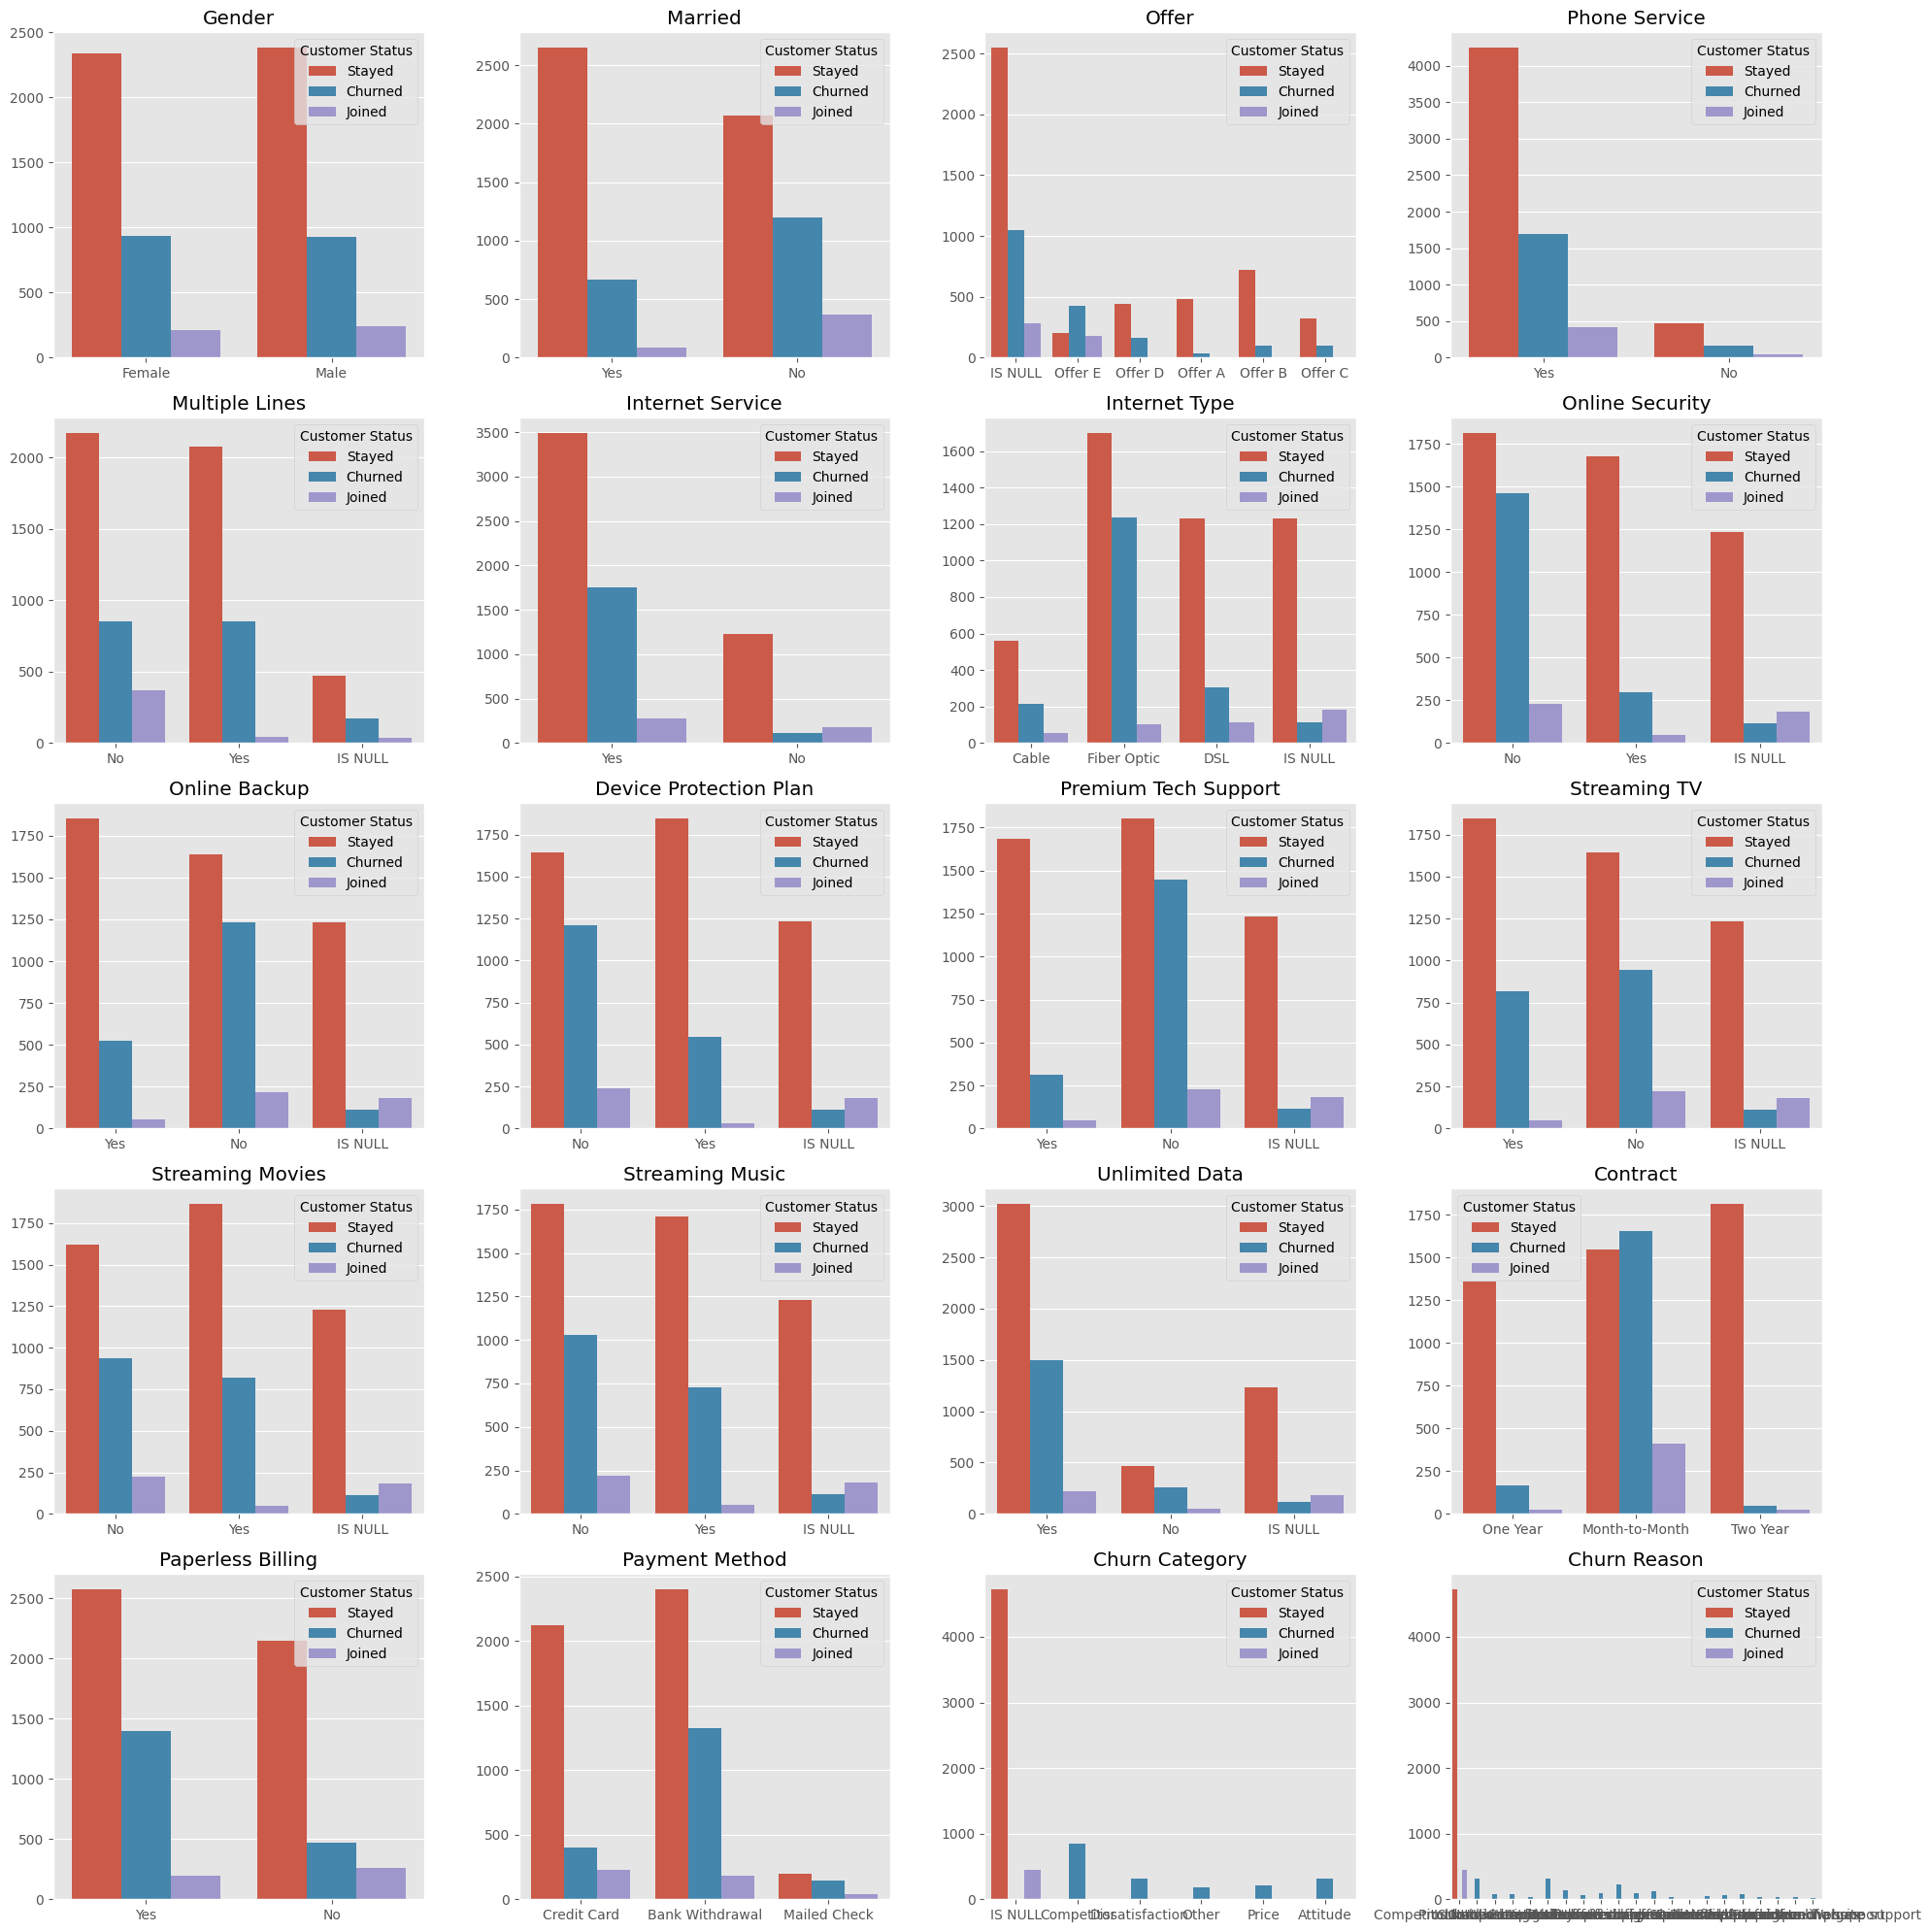

In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=5, figsize=(20, 20))
axs = axs.flatten()

for i, col in enumerate(df.drop(target, axis=1).select_dtypes('object').columns):
    sns.countplot(data=df, x=col, hue=target, ax=axs[i])
    axs[i].set_xlabel(None)
    axs[i].set_ylabel(None)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [14]:
print('Categories e reasons list')
display(df[df[target]=='Churned'][['Churn Category', 'Churn Reason']].drop_duplicates().sort_values(by=['Churn Category', 'Churn Reason']))

print('Proportion')
display(df[df[target]=='Churned'][['Churn Category', 'Churn Reason']].value_counts(normalize=True).to_frame()*100)
display(df[df[target]=='Churned'][['Churn Category']].value_counts(normalize=True).to_frame()*100)

Categories e reasons list


,Churn Category,Churn Reason
25,Attitude,Attitude of service provider
63,Attitude,Attitude of support person
2,Competitor,Competitor had better devices
19,Competitor,Competitor made better offer
67,Competitor,Competitor offered higher download speeds
72,Competitor,Competitor offered more data
271,Dissatisfaction,Lack of self-service on Website
18,Dissatisfaction,Limited range of services
4,Dissatisfaction,Network reliability
293,Dissatisfaction,Poor expertise of online support


Proportion


proportion
Churn Category  Churn Reason                                         
Competitor      Competitor had better devices               16.746923
                Competitor made better offer                16.639914
Attitude        Attitude of support person                  11.771001
Other           Don't know                                   6.955591
Competitor      Competitor offered more data                 6.260032
                Competitor offered higher download speeds    5.350455
Attitude        Attitude of service provider                 5.029428
Price           Price too high                               4.173355
Dissatisfaction Product dissatisfaction                      4.119850
                Network reliability                          3.852327
Price           Long distance charges                        3.424291
Dissatisfaction Service dissatisfaction                      3.370787
Other           Moved                                        2.461209
Price           Extra data charges                           2.086677
Dissatisfaction Limited range of services                    1.979668
                Poor expertise of online support             1.658641
Price           Lack of affordable download/upload speed     1.605136
Dissatisfaction Lack of self-service on Website              1.551632
                Poor expertise of phone support              0.642055
Other           Deceased                                     0.321027

,proportion
Churn Category,
Competitor,44.997325
Dissatisfaction,17.174960
Attitude,16.800428
Price,11.289460
Other,9.737828


In [15]:
churn_reasons = sorted(df[df[target]=='Churned']['Churn Reason'].unique())

In [16]:
new_categories = pd.DataFrame({
    'Churn Reason': churn_reasons,
    'new_category': [
        'Client service', 'Client service', 'Product quality', 'Product quality', 'Product quality', 'Product quality',
        'Other', 'Other', 'Price', 'Price', 'Product quality', 'Product quality', 'Price', 'Other', 'Product quality',
        'Client service', 'Client service', 'Price', 'Product quality', 'Product quality'
    ]
})

df = df.merge(
    right=new_categories,
    how='left',
    on='Churn Reason'
)
df.head()

,Gender,Age,Married,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,new_category
0,Female,37,Yes,0,93225,34.827662,-118.999073,2,9,IS NULL,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,IS NULL,IS NULL,NaN
1,Male,46,No,0,91206,34.162515,-118.203869,0,9,IS NULL,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,IS NULL,IS NULL,NaN
2,Male,50,No,0,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,Product quality
3,Male,78,Yes,0,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,Product quality
4,Female,75,Yes,0,93010,34.227846,-119.079903,3,3,IS NULL,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,Product quality


In [17]:
df['new_category'] = df['new_category'].fillna('IS NULL')
df['new_category'].head()

0            IS NULL
1            IS NULL
2    Product quality
3    Product quality
4    Product quality
Name: new_category, dtype: object

,new_category,proportion
0,Product quality,59.871589
1,Client service,19.101124
2,Price,11.289460
3,Other,9.737828


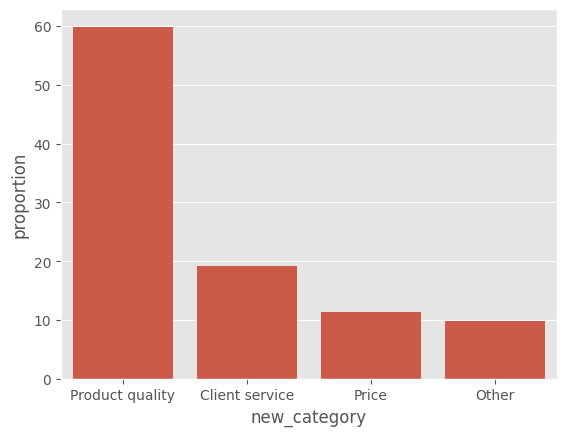

In [18]:
churned_new_categories_proportion = pd.DataFrame(df[df[target]=='Churned']['new_category'].value_counts(normalize=True)*100).reset_index()

display(churned_new_categories_proportion)

sns.barplot(data=churned_new_categories_proportion, x='new_category', y='proportion')
plt.show()

In [19]:
hue_order = churned_new_categories_proportion['new_category'].unique().tolist()

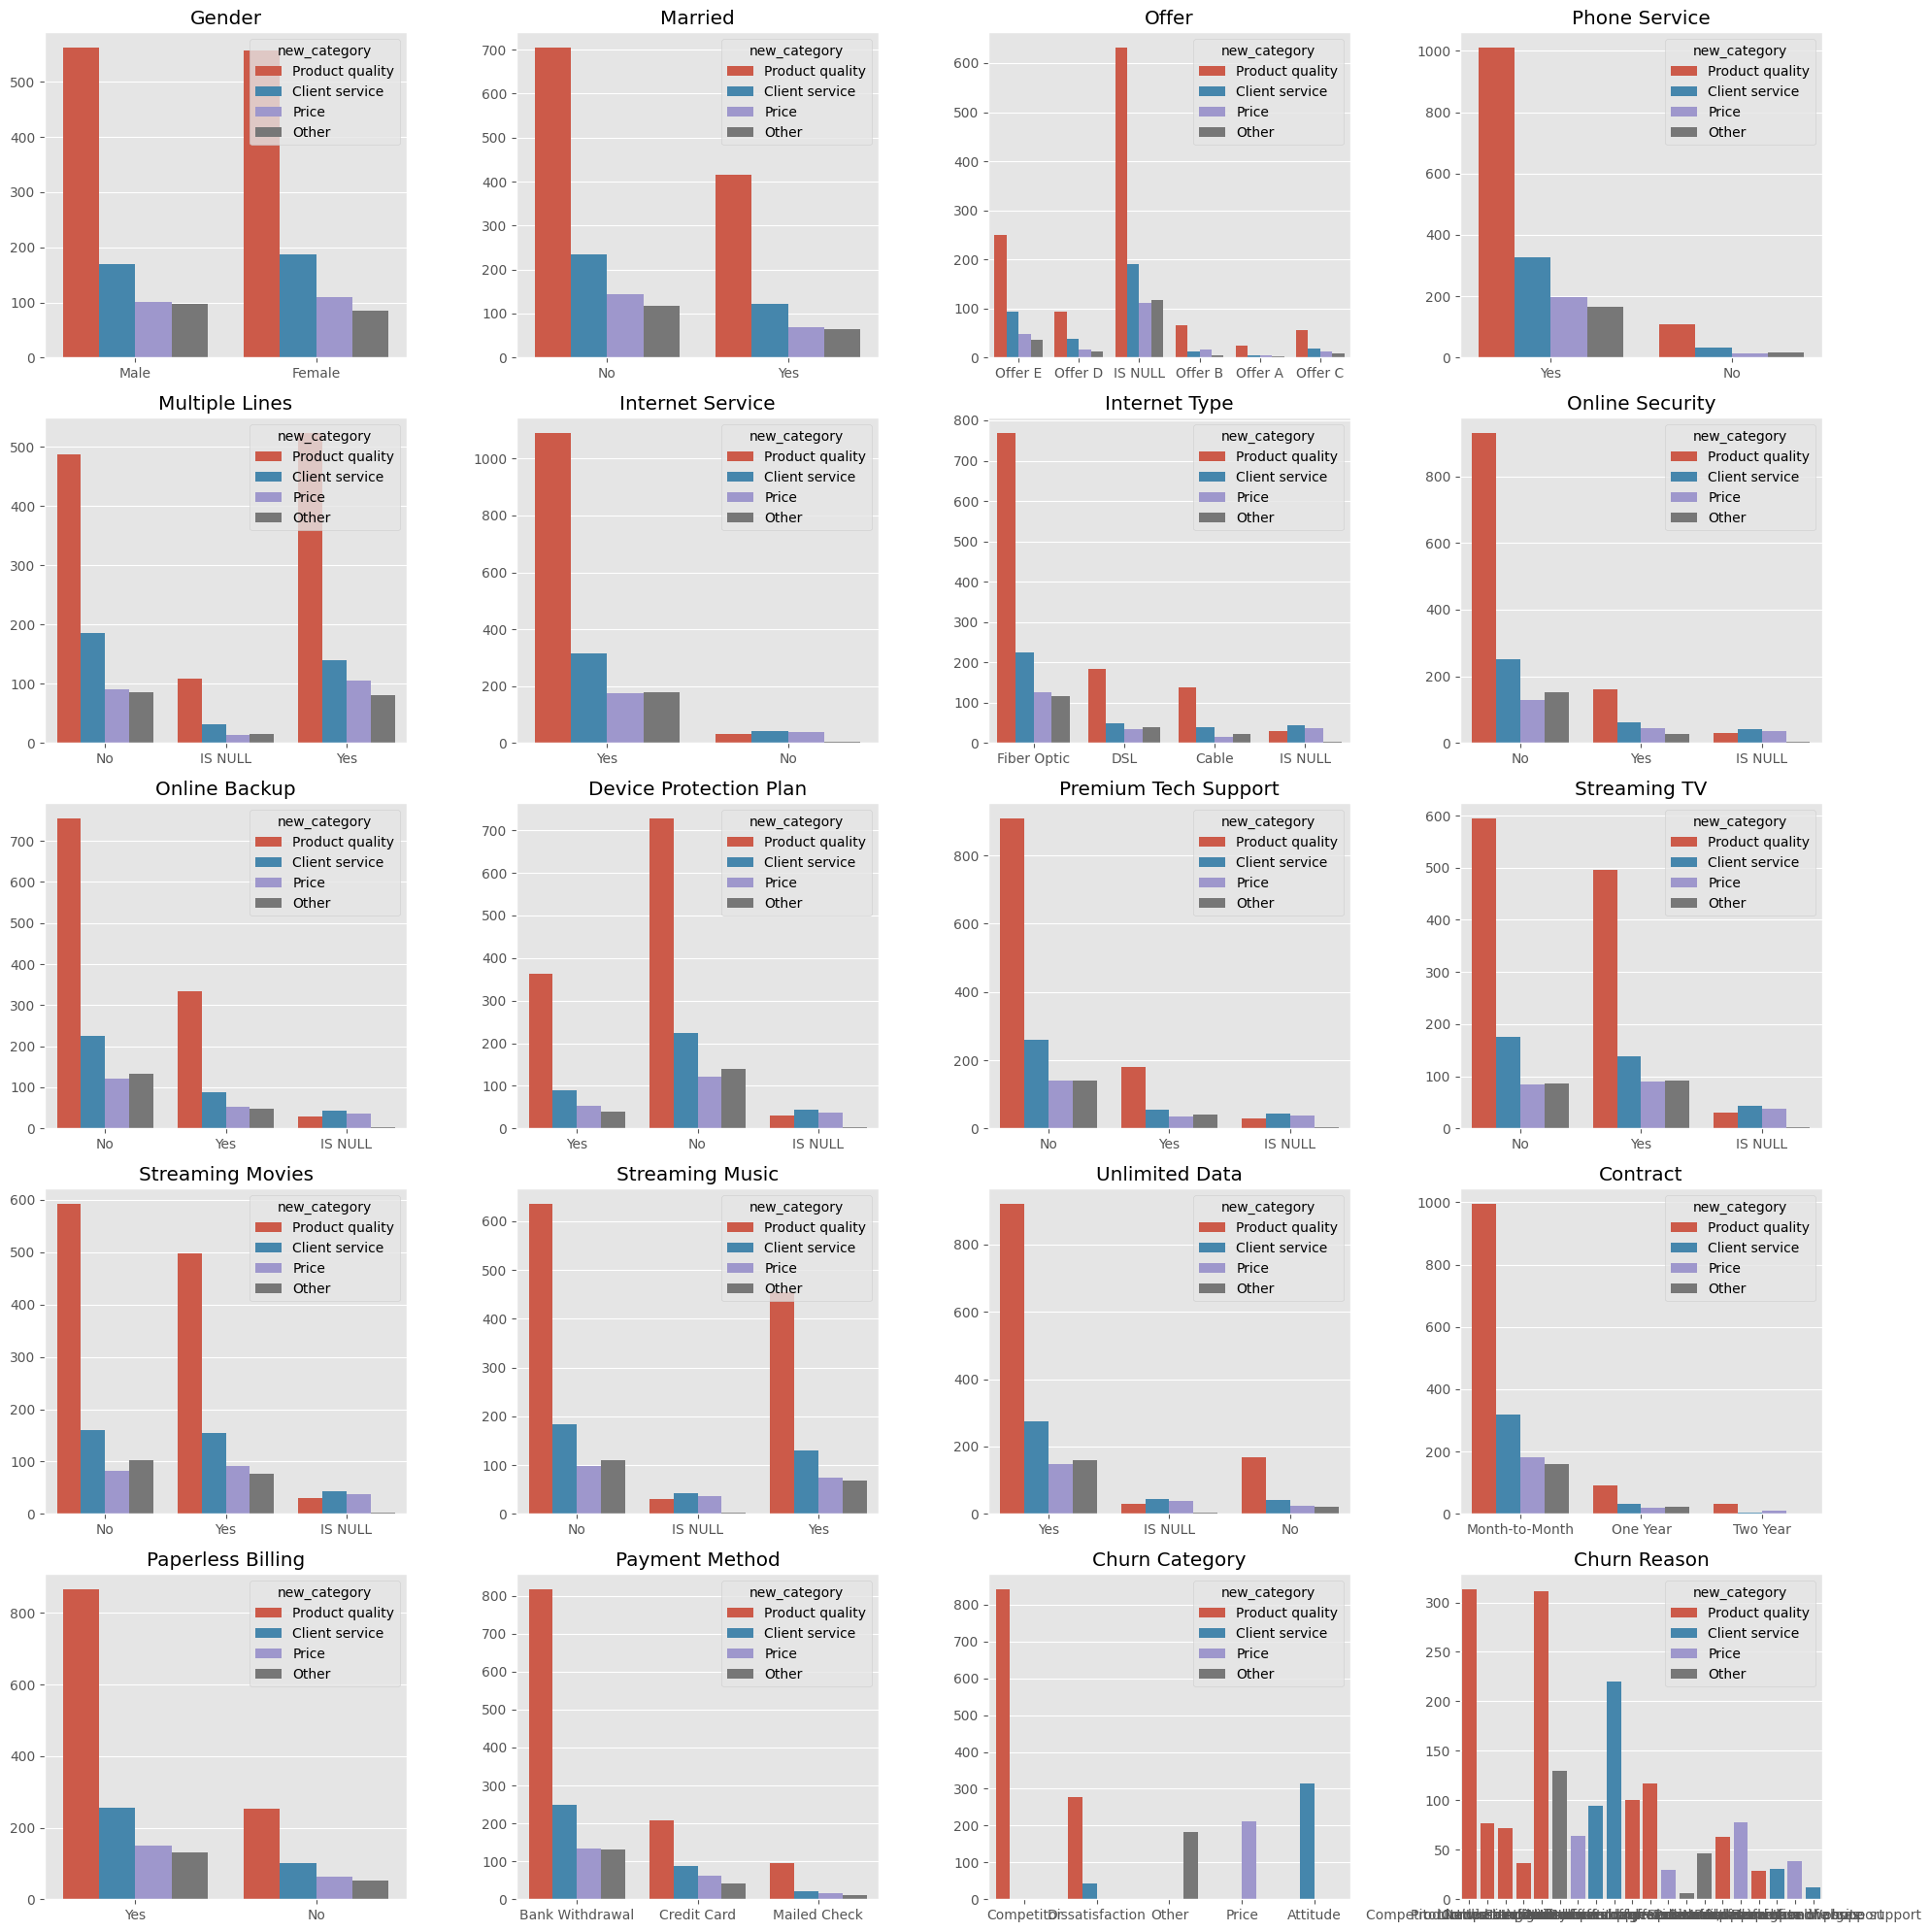

In [20]:
fig, axs = plt.subplots(ncols=4, nrows=5, figsize=(20, 20))
axs = axs.flatten()

for i, col in enumerate(df.drop([target, 'new_category'], axis=1).select_dtypes('object').columns):
    sns.countplot(data=df[df[target]=='Churned'], x=col, hue='new_category', hue_order=hue_order, ax=axs[i])
    axs[i].set_xlabel(None)
    axs[i].set_ylabel(None)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

# Quantitative

In [21]:
df = df.drop(['Zip Code', 'Latitude', 'Longitude'], axis=1)

In [22]:
df.select_dtypes('number').head()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,37,0,2,9,42.39,16.0,65.6,593.30,0.00,0,381.51,974.81
1,46,0,0,9,10.69,10.0,-4.0,542.40,38.33,10,96.21,610.28
2,50,0,0,4,33.65,30.0,73.9,280.85,0.00,0,134.60,415.45
3,78,0,1,13,27.82,4.0,98.0,1237.85,0.00,0,361.66,1599.51
4,75,0,3,3,7.38,11.0,83.9,267.40,0.00,0,22.14,289.54


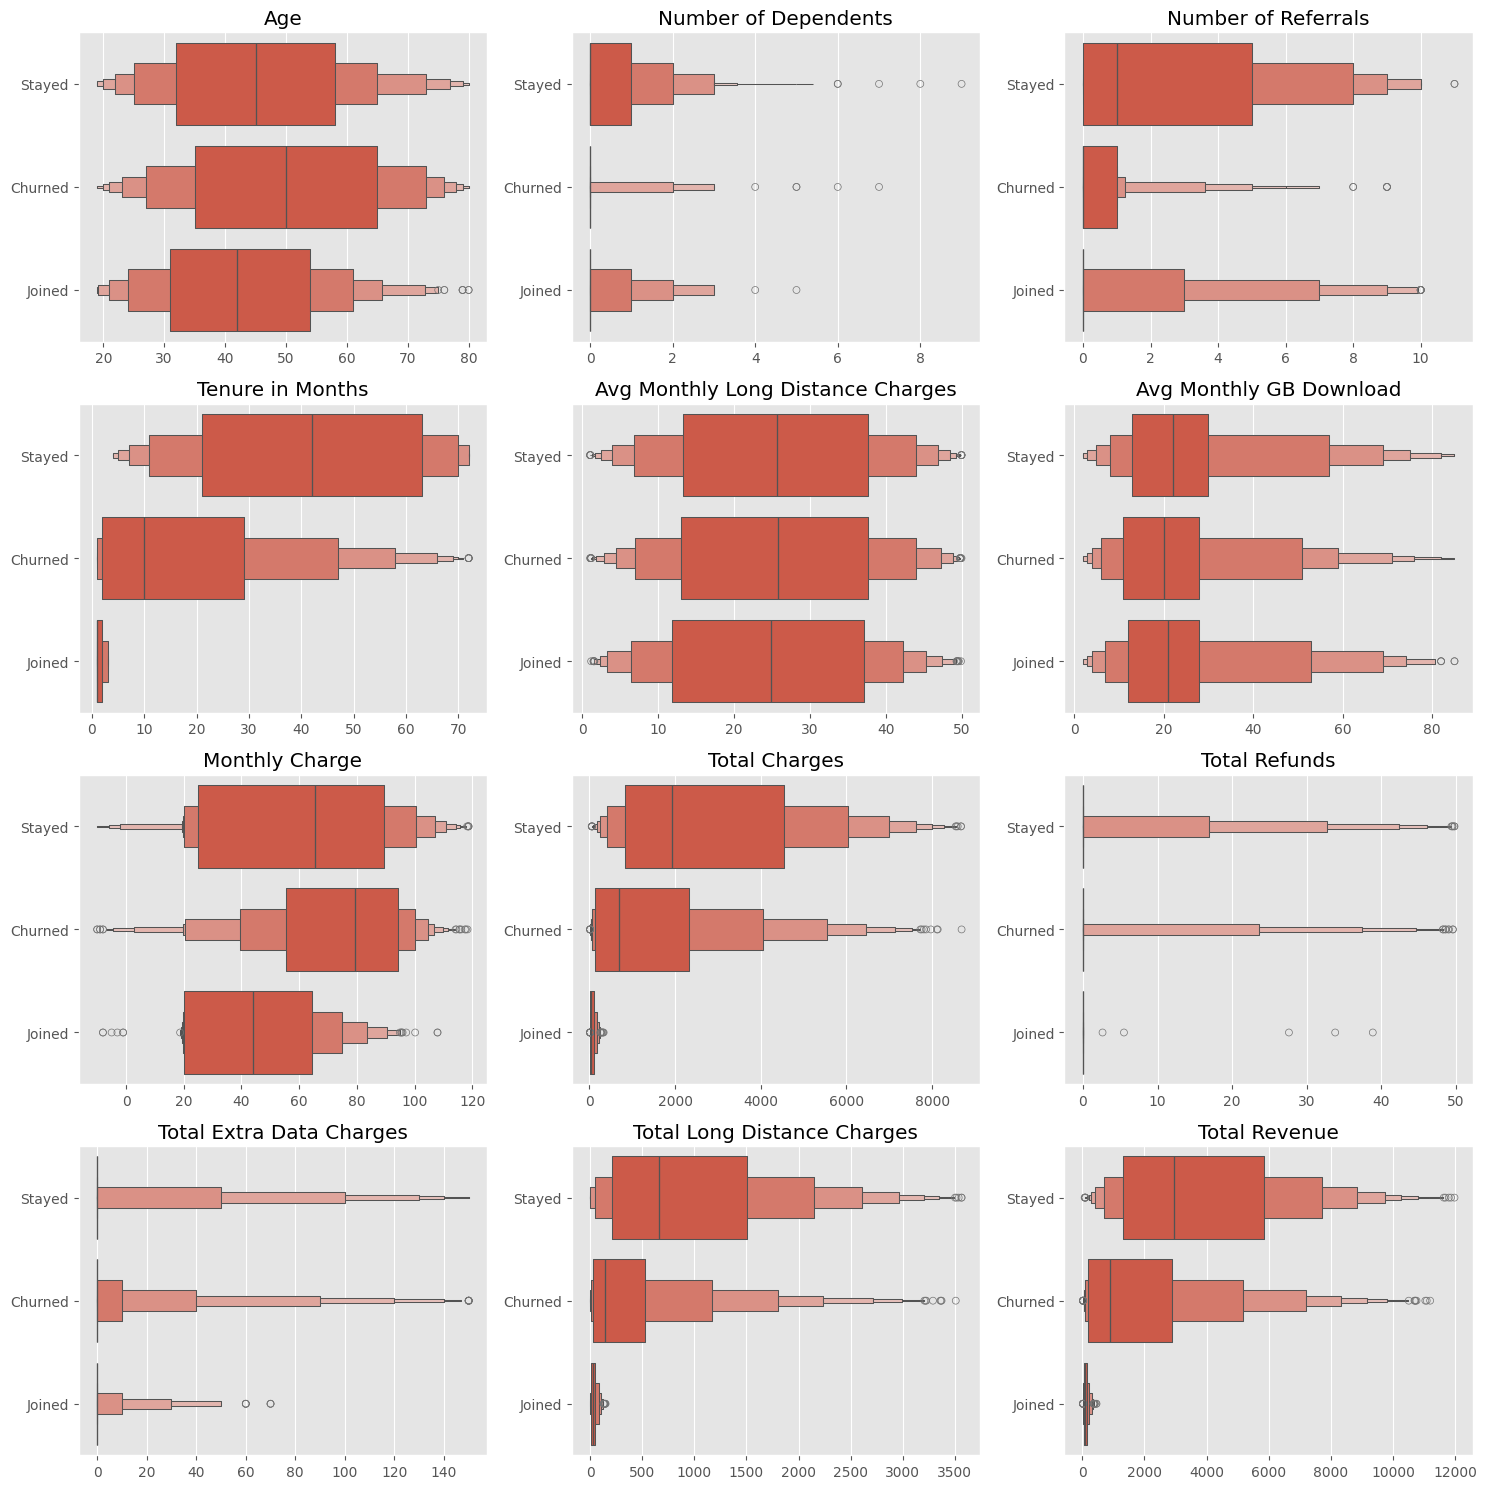

In [23]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axs = axs.flatten()

for i, col in enumerate(df .select_dtypes('number') .columns):
    sns.boxenplot(data=df, x=col, y=target, ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_ylabel(None)
    axs[i].set_xlabel(None)

plt.tight_layout()
plt.show()